In [115]:
import numpy as np
import pandas as pd

from sklearn.cluster import DBSCAN
from sklearn import metrics
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt

In [116]:
# DATA CREATION:

centers = [[1,1], [-1,-1],[1,-1]]
X, labels_true = make_blobs(n_samples=750, centers=centers, cluster_std=0.4, random_state=0)

In [117]:
X

array([[ 0.84022039,  1.14802236],
       [-1.15474834, -1.2041171 ],
       [ 0.67863613,  0.72418009],
       ...,
       [ 0.26798858, -1.27833405],
       [-0.88628813, -0.30293249],
       [ 0.60046048, -1.29605472]])

In [118]:
labels_true

array([0, 1, 0, 2, 0, 1, 1, 2, 0, 0, 1, 1, 1, 2, 1, 0, 1, 1, 2, 2, 2, 2,
       2, 2, 1, 1, 2, 0, 0, 2, 0, 1, 1, 0, 1, 0, 2, 0, 0, 2, 2, 1, 1, 1,
       1, 1, 0, 2, 0, 1, 2, 2, 1, 1, 2, 2, 1, 0, 2, 1, 2, 2, 2, 2, 2, 0,
       2, 2, 0, 0, 0, 2, 0, 0, 2, 1, 0, 1, 0, 2, 1, 1, 0, 0, 0, 0, 1, 2,
       1, 2, 2, 0, 1, 0, 1, 0, 1, 1, 0, 0, 2, 1, 2, 0, 2, 2, 2, 2, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 2, 1, 0, 0, 1, 2, 1, 0, 0, 2, 0, 2,
       2, 2, 0, 1, 2, 2, 0, 1, 0, 2, 0, 0, 2, 2, 2, 2, 1, 0, 2, 1, 1, 2,
       2, 2, 0, 1, 0, 1, 0, 1, 0, 2, 2, 1, 1, 2, 2, 1, 0, 1, 2, 2, 2, 1,
       1, 2, 2, 0, 1, 2, 0, 0, 2, 0, 0, 1, 0, 1, 0, 1, 1, 2, 2, 0, 0, 1,
       1, 2, 1, 2, 2, 2, 2, 0, 2, 0, 2, 2, 0, 2, 2, 2, 0, 0, 1, 1, 1, 2,
       2, 2, 2, 1, 2, 2, 0, 0, 2, 0, 0, 0, 1, 0, 1, 1, 1, 2, 1, 1, 0, 1,
       2, 2, 1, 2, 2, 1, 0, 0, 1, 1, 1, 0, 1, 0, 2, 0, 2, 0, 2, 2, 2, 1,
       1, 0, 0, 1, 1, 0, 0, 2, 1, 2, 2, 1, 1, 2, 1, 2, 0, 2, 2, 0, 1, 2,
       2, 0, 2, 2, 0, 0, 2, 0, 2, 0, 2, 1, 0, 0, 0,

In [119]:
X = StandardScaler().fit_transform(X)

In [120]:
X

array([[ 0.49426097,  1.45106697],
       [-1.42808099, -0.83706377],
       [ 0.33855918,  1.03875871],
       ...,
       [-0.05713876, -0.90926105],
       [-1.16939407,  0.03959692],
       [ 0.26322951, -0.92649949]])

In [121]:
# DBSCAN
db = DBSCAN(eps=0.3, min_samples=10).fit(X)

core_samples_mask = np.zeros_like(db.labels_, dtype=bool) #creating an array of true and false as the same size as db.label
core_samples_mask[db.core_sample_indices_] = True # Setting the indices of core regions to true
labels_ = db.labels_ # Labelling the clustered data


In [122]:
# Number of clusters in labels, ignoring noise if present:
n_clusters = len(set(labels_)) - (1 if -1 in labels else 0) #label -1 considered as noise by DBScanalgo
n_noise = list(labels_).count(-1) # calculating the number of clusters

In [123]:
n_clusters

3

In [124]:
n_noise

18

In [125]:
print("Homogeneity: %0.3f" % metrics.homogeneity_score(labels_true, labels))
#A clusterning result satisfies Hom if all its clusters contain only data points which are members of a single class.

Homogeneity: 0.953


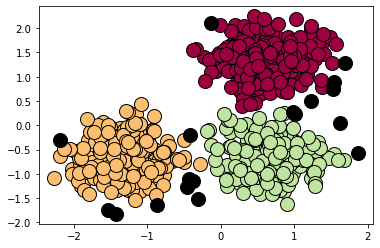

In [126]:
# Plotting the result:

unique_labels = set(labels) #to identify all unique clusters labels
colors = [plt.cm.Spectral(each)
         for each in np.linspace(0,1, len(unique_labels)) #creating the list of colors, generating colormap
         ]

for k, col in zip(unique_labels, colors):
    
    if k == -1:
        # use Black color for noise.
        col = [0,0,0,1]
        
    class_member_mask = (labels_ == k) # assigning class members for each class
    
    xy = X[class_member_mask & core_samples_mask] # Creating list of points for each class
    
    plt.plot(xy[:,0], xy[:,1], 'o', markerfacecolor=tuple(col), markeredgecolor='k', markersize=14)
    
    xy = X[class_member_mask & ~core_samples_mask] # creting the list of noise points
    
    plt.plot(xy[:,0], xy[:, 1], 'o', markerfacecolor=tuple(col),markeredgecolor='k', markersize=14)
    

### Evaluating the cluster:
    

In [127]:
## External Measurements:
#1. Rand Index:
print("Rand Index: %0.3f" % metrics.adjusted_rand_score(labels_true, labels))
    

Rand Index: 0.952


In [137]:
# 1. Jaccard Coefficient:

jaccard_score(labels_true, labels_, average='micro')

0.9455252918287937

In [139]:
# 3. Purity and impurity of data:

def purity_score(y_true, y_pred):
    # computing contingency matrix / confusion matrix
    
    contingency_matrix = metrics.cluster.contingency_matrix(y_true, y_pred)
    
    # Return Purity:
    return np.sum(np.amax(contingency_matrix, axis=0)) / np.sum(contingency_matrix)


purity_score(labels_true, labels)

0.9813333333333333